In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/index_calculate_2.xlsx',sheet_name='Sheet2')

In [ ]:
df.drop(['Tumour types'],axis=1,inplace=True)


In [ ]:
df['Lip_inski'].replace(True,1,inplace=True)
df['Lip_inski'].replace(False,0,inplace=True)
df['Lip_inski_1'].replace(True,1,inplace=True)
df['Lip_inski_1'].replace(False,0,inplace=True)

<ipython-input-4-ad5b651e0da5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lip_inski'].replace(True,1,inplace=True)
<ipython-input-4-ad5b651e0da5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lip_inski'].replace(False,0,inplace=True)
<ipython-input-4-ad5b651e0da5>:3: FutureWarning: 

In [ ]:
df_cols=list(df.columns)
df_cols.remove('Top_PSA')

In [ ]:
from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
X=df[df_cols]
# 'Top_PSA'
y=df['Top_PSA']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
# y=df.iloc[:,-2]
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


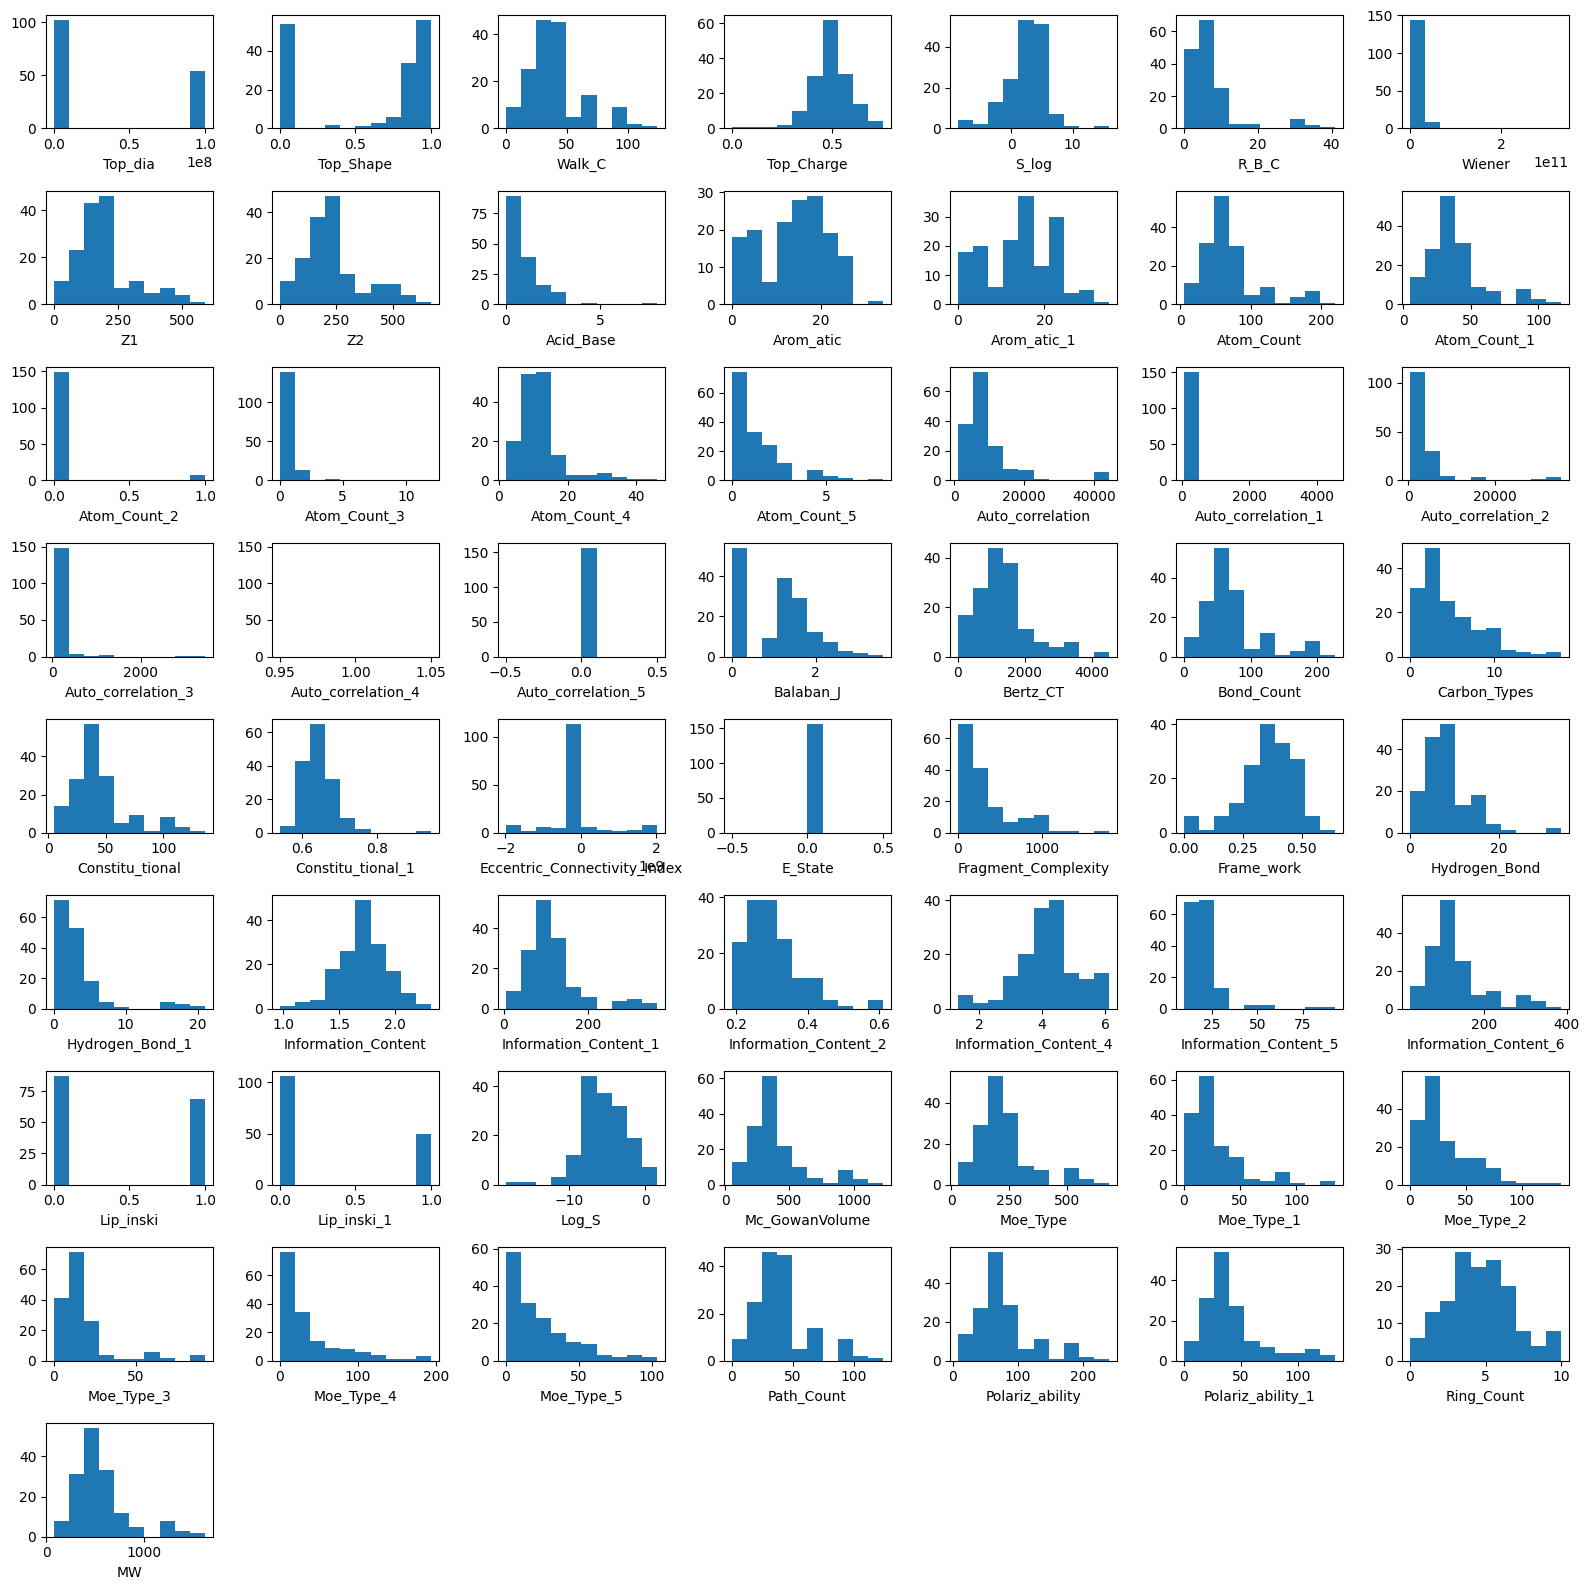

In [ ]:
plt.figure(figsize=(16,16))
# plt.title('Distributions of training data after robust scaling.')
df_x_train=pd.DataFrame(X_train,columns=X.columns)
j=0
for i in df_x_train.columns:
  j+=1
  print(j)
  plt.subplot(9,7,j)
  plt.hist(df[i])
  plt.xlabel(f'{i}')

plt.tight_layout()
# plt.savefig('RS_training.eps')

In [ ]:
X_train.head()

,Top_dia,Top_Shape,Walk_C,Top_Charge,S_log,R_B_C,Wiener,Z1,Z2,Acid_Base,...,Moe_Type_1,Moe_Type_2,Moe_Type_3,Moe_Type_4,Moe_Type_5,Path_Count,Polariz_ability,Polariz_ability_1,Ring_Count,MW
56,100000000,0.000,38,0.592436,-0.09243,4,35600001207,188,220,2,...,24.833806,28.121163,22.498021,59.280487,43.419538,38,65.311239,37.770761,4,574.095737
138,16,1.000,36,0.423461,2.34740,4,3188,176,212,0,...,9.799819,13.979489,5.559267,5.817221,14.563571,36,62.779239,30.780761,5,434.175419
123,32,1.000,96,0.482487,-3.10570,31,52357,458,522,3,...,89.553096,67.689827,70.586894,132.387114,6.025070,96,185.568612,103.533388,6,1268.641439
128,15,0.875,30,0.711714,2.87958,5,2378,152,175,0,...,10.423316,35.880522,5.316789,50.218760,76.639217,30,49.931102,27.160898,2,430.061041
127,9,0.800,23,0.709424,2.44840,2,974,120,143,0,...,5.316789,27.683631,10.216698,39.827667,38.740701,23,34.886930,18.553070,2,317.062340


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# sc.fit(X_train)
# X_train=sc.transform(X_train)
# X_test=sc.transform(X_test)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# sc=MinMaxScaler()
# sc.fit(X_train)
# X_train=sc.transform(X_train)
# X_test=sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
rs_df_x_train=pd.DataFrame(X_train,columns=X.columns)

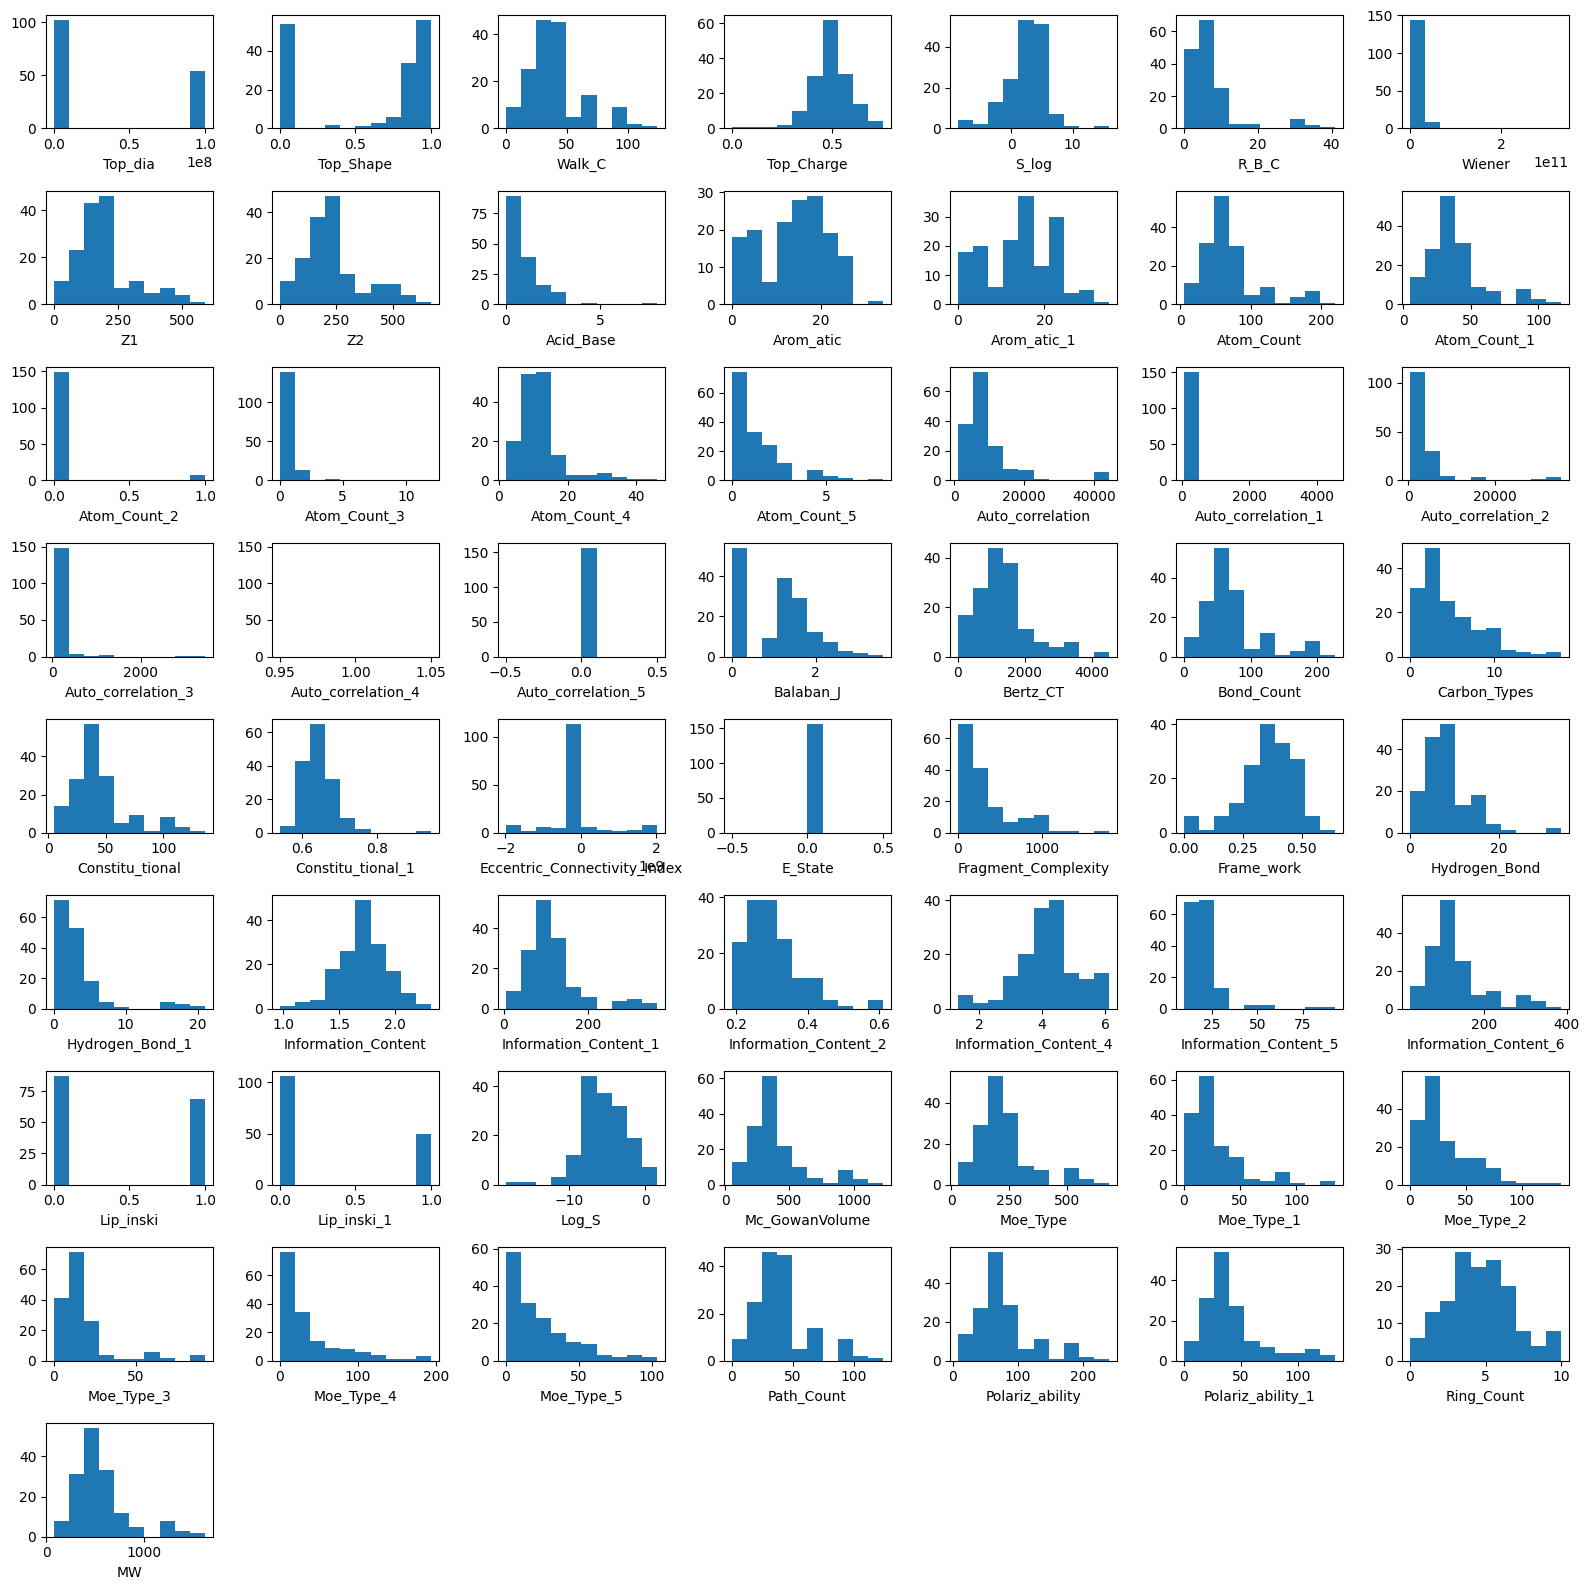

In [ ]:
plt.figure(figsize=(16,16))
# plt.title('Distributions of training data after robust scaling.')

j=0
for i in rs_df_x_train.columns:
  j+=1
  plt.subplot(9,7,j)
  plt.hist(df[i])
  plt.xlabel(f'{i}')

plt.tight_layout()
plt.savefig('RS_training.eps')

In [ ]:
rs_df_x_train['Walk_C'].min(),rs_df_x_train['Walk_C'].max()

(-1.7435897435897436, 4.512820512820513)

In [ ]:
df_x_train['Walk_C'].min(),df_x_train['Walk_C'].max()

(2, 124)

In [ ]:
df_x_train['Acid_Base']

,Acid_Base
56,2
138,0
123,3
128,0
127,0
...,...
71,0
106,2
14,1
92,0


In [ ]:
rs_df_x_train['Acid_Base']

,Acid_Base
0,2.0
1,0.0
2,3.0
3,0.0
4,0.0
...,...
119,0.0
120,2.0
121,1.0
122,0.0


In [ ]:
# from sklearn.preprocessing import PowerTransformer
# sc=PowerTransformer(standardize=False)
# sc.fit(X_train)
# X_train=sc.transform(X_train)
# X_test=sc.transform(X_test)

#normalization---->LR check

In [ ]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=20)
# pca.fit(X_train)
# X_train=pca.transform(X_train)
# X_test=pca.transform(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pLR=LR.predict(X_test)
LRr2=r2_score(y_test,y_pLR)
LRmse=mean_squared_error(y_test,y_pLR)

In [ ]:
Las=Lasso()
Las.fit(X_train,y_train)
y_pLas=Las.predict(X_test)
Lasr2=r2_score(y_test,y_pLas)
Lasmse=mean_squared_error(y_test,y_pLas)

In [ ]:
Rid=Ridge(solver='cholesky')
Rid.fit(X_train,y_train)
y_pRid=Rid.predict(X_test)
Ridr2=r2_score(y_test,y_pRid)
Ridmse=mean_squared_error(y_test,y_pRid)

In [ ]:
# pca_comp=list(pca.get_feature_names_out())

In [ ]:
features=X.columns

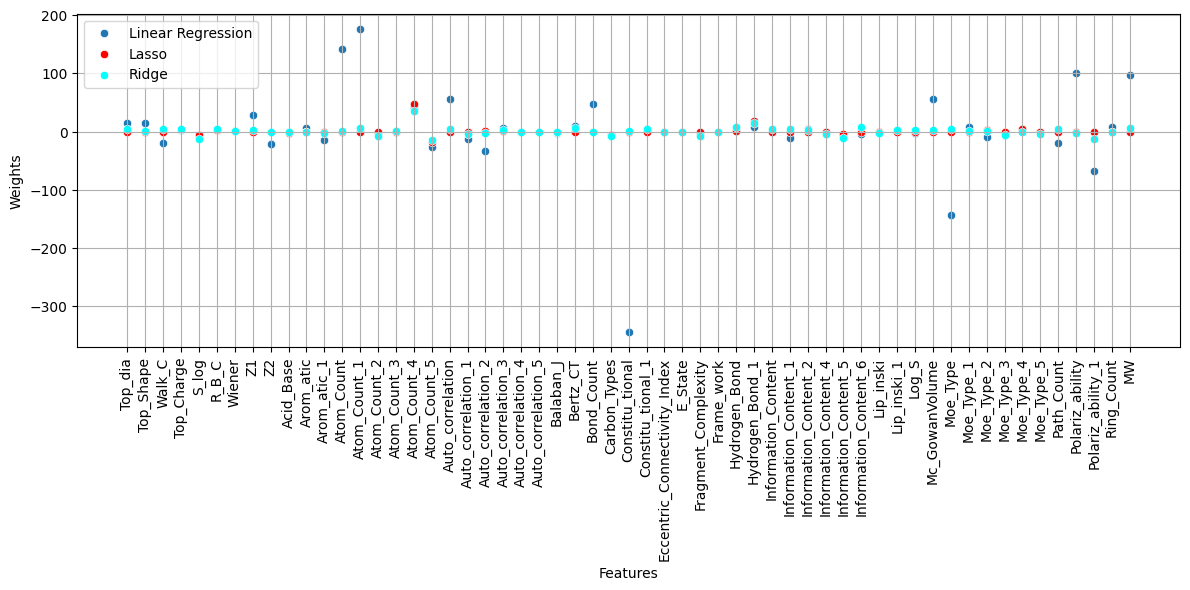

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=features,y=LR.coef_,label='Linear Regression')
sns.scatterplot(x=features,y=Las.coef_,color='red',label='Lasso')
sns.scatterplot(x=features,y=Rid.coef_,color='cyan',label='Ridge')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('RS_weights.eps')
# plt.show()

In [ ]:
LRr2,Lasr2,Ridr2

(0.6351017999223929, 0.9767823352501948, 0.8707669397928783)

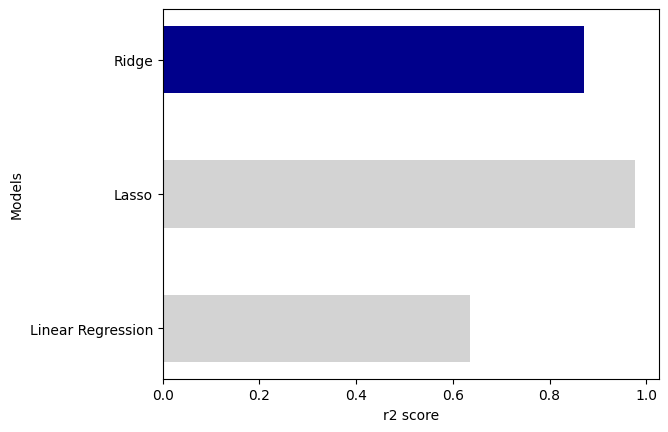

In [ ]:
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','lightgrey','darkblue'],height=0.5)
plt.xlabel('r2 score')
plt.ylabel('Models')
plt.show()

In [ ]:
LRmse,Lasmse,Ridmse

(3091.869825236244, 196.72883296521235, 1095.0226643824403)

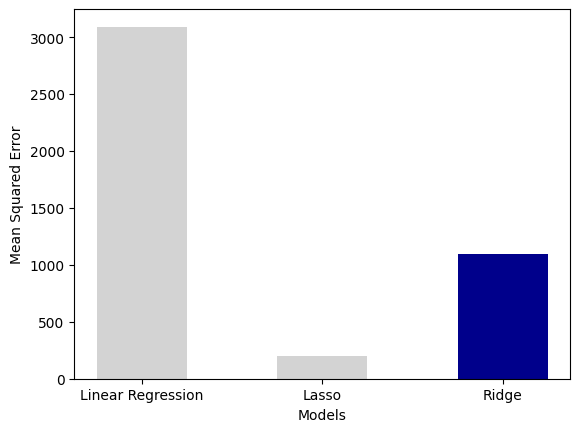

In [ ]:
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','lightgrey','darkblue'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

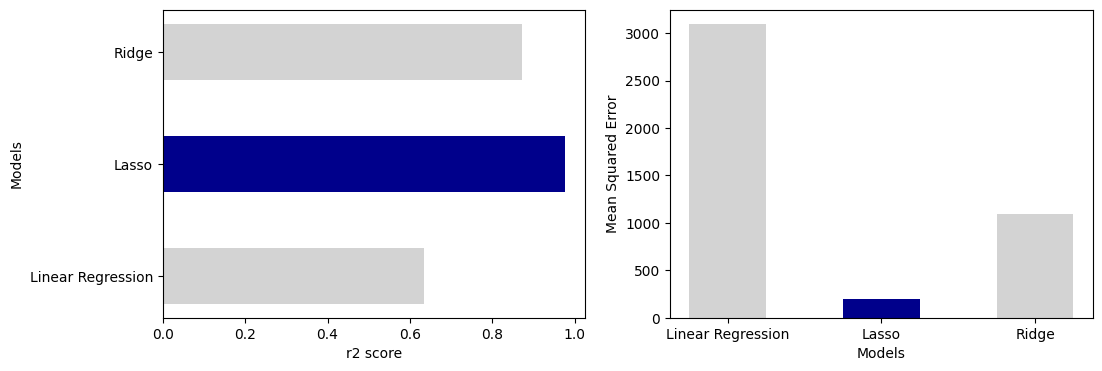

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','darkblue','lightgrey'],height=0.5)
plt.xlabel('r2 score')
plt.ylabel('Models')
# plt.show()
plt.subplot(1,2,2)
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','darkblue','lightgrey'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
# plt.show()
plt.savefig('RS_r2mse.eps')


In [ ]:
df_weights=pd.DataFrame({
    'Features':features,
    'Linear Regression':LR.coef_,
    'Lasso':Las.coef_,
    'Ridge':Rid.coef_
})
for i in df_weights.columns:
  if i!='Features':
    print(f"{i}: {df_weights.sort_values(i,ascending=False).head(1)['Features'].values}")

Linear Regression: ['Atom_Count_1']
Lasso: ['Atom_Count_4']
Ridge: ['Atom_Count_4']


In [ ]:
float(LR.intercept_),float(Las.intercept_),float(Rid.intercept_)

(125.94618854520786, 133.16163328239963, 131.68921512203846)